# Includes

In [197]:
from commonfunctions import *
import cv2

## Left Pipeline
- Gray Conversion
- Noise Removal
- Edge Detection
- Dilation

### Gray Conversion

In [198]:
def grayConversion(frame):
    # conversion of BGR to grayscale is necessary to apply this operation
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    return gray

### Sharpening

In [199]:
def sharpen(frame):
    # sharpening the image
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpened = cv2.filter2D(frame, -1, kernel)
    return sharpened

    # # gaussian filter
    # blur = cv2.GaussianBlur(frame, (5,5), 0)
    # # unsharp masking
    # sharpened = cv2.addWeighted(frame, 1.5, blur, -0.5, 0)
    # return sharpened


### Noise Removal

In [200]:
def noiseRemoval(frame):
    # noise removal using median filter
    median = cv2.medianBlur(frame, 11)
    # gaussian
    blur = cv2.GaussianBlur(median, (3,3), 0)
    return blur

### Edge Detection

In [201]:
# canny edge detector
def cannyDetector(frame):
    # canny = cv2.adaptiveThreshold(frame, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    # canny edge detector
    canny = cv2.Canny(frame, 150, 190)
    return canny 


### Dilation

In [202]:
# dilation
def dilation(frame):
    # dilation
    kernel = np.ones((2, 2), np.uint8)
    dilation = cv2.dilate(frame, kernel, iterations=1)
    
    return dilation

### Color Conversion

In [203]:
def colorConversion(frame):
    # conversion of GRAY to BGR
    BGR = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
    return BGR

In [204]:
def leftPipeline(frame):
    gray        = grayConversion(frame)
    denoised    = noiseRemoval(gray)
    sharpened   = sharpen(denoised)
    canny       = cannyDetector(sharpened)
    dilated     = dilation(canny)
    # BGR         = colorConversion(dilated)
    dilated = 255 - dilated
    return dilated

## Right Pipeline
- Separating RGB Channels
- Average Filtering
- Color Quantization
- Combining RGB Channels

### Separating RGB channels

In [205]:
def separateRGB(frame):
    # separate the RGB channels
    b, g, r = cv2.split(frame)
    return b, g, r

### Average Filtering

In [206]:
def averageFilter(b, g, r):
    # average filter
    b = cv2.blur(b, (5,5))
    g = cv2.blur(g, (5,5))
    r = cv2.blur(r, (5,5))
    return b, g, r

### Color Quantization
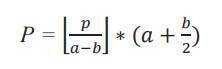

In [207]:
def quantize(b, g, r):
    x = 200
    y = 180
    
    # quantize the image
    b = np.uint8(b/(x - y))*(x + (y // 2))
    g = np.uint8(g/(x - y))*(x + (y // 2))
    r = np.uint8(r/(x - y))*(x + (y // 2))

    # normalize
    b = np.uint8(b/np.max(b)*255)
    g = np.uint8(g/np.max(g)*255)
    r = np.uint8(r/np.max(r)*255)

    return b, g, r

### Combining RGB Channels

In [208]:
def combine(b, g, r):
    # combine the channels
    combined = cv2.merge((b, g, r))
    return combined

In [209]:
def rightPipeline(frame):
    b, g, r = separateRGB(frame)
    b, g, r = averageFilter(b, g, r)
    b, g, r = quantize(b, g, r)
    combined = combine(b, g, r)
    
    return combined

## Reading the video frame by frame

In [210]:
# Creating a VideoCapture object to read the video
cap = cv2.VideoCapture('data/Succession-Season-1-1080.mp4')

# Loop until the end of the video
while (cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()

    frame = cv2.imread("data/Farah3.jpeg", cv2.IMREAD_COLOR)

    frame = cv2.resize(frame, (540, 380), fx = 0, fy = 0,
                         interpolation = cv2.INTER_CUBIC)
    
    # Display the resulting frame
    cv2.imshow('Frame', frame)
 
    # conversion of BGR to grayscale is necessary to apply this operation
    leftPipe = leftPipeline(frame)
    rightPipe = rightPipeline(frame)
    combined = cv2.bitwise_and(rightPipe, rightPipe, mask=leftPipe)
    
    cv2.imshow('left', leftPipe)
    cv2.imshow('right', rightPipe)
    cv2.imshow('da5alo f ba3d', combined)

    
    # define q as the exit button
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
 
# release the video capture object
cap.release()
# Closes all the windows currently opened.
cv2.destroyAllWindows()